The aim of this project is to demonstrate data importing, data cleaning techniques and to conduct data exploration on sales data.
The main goals of the data exploration is to answer the following questions:
1. What month obtained the most sales during the year?
2. What city obtained the most sales?
3. What is the best time to display adversitements?

In [1]:
#import packages

import pandas as pd
import os

In [2]:
#concatenating multiple csvs into one csv 
complete_data = pd.DataFrame()

files = [file for file in os.listdir(r'C:\Users\liamf\Desktop\data analytics\python\Sales_Data')]

#for file in files:
    #print(file)
    
for file in files:
    df = pd.read_csv(r'C:\Users\liamf\Desktop\data analytics\python\Sales_Data\\'+file)
    complete_data = pd.concat([complete_data, df])
    
#complete_data.head(10)

complete_data.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\complete_data_file.csv")

In [3]:
all_data = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\complete_data_file.csv")
#all_data.head()

In [4]:
#augment data with additional columns

all_data['Month'] = all_data['Order Date'].str[0:2]



In [5]:
#Data cleaning - removing NaN

#nan_df = all_data[all_data.isna().any(axis=1)]

#nan_df

cleaned_data = all_data

cleaned_data = cleaned_data.drop(['Unnamed: 0'], axis=1)

cleaned_data = cleaned_data.dropna(how="all")

cleaned_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [6]:
#removing rows with headers duplicated in rows 

final_data = cleaned_data[cleaned_data['Order Date'].str[0:2] != 'Or']

final_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [7]:
#converting column from str to int data type
final_data['Month'] = final_data['Month'].astype('int32')

final_data.head(5)

C:\Users\liamf\AppData\Local\Temp\ipykernel_7708\2966236067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Month'] = final_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
# checking column data types

final_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [30]:
#using a different method to convert column format

final_data['Price Each'] = pd.to_numeric(final_data['Price Each'])
final_data['Quantity Ordered'] = pd.to_numeric(final_data['Quantity Ordered'])

final_data.head(5)

C:\Users\liamf\AppData\Local\Temp\ipykernel_15184\1293545820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Price Each'] = pd.to_numeric(final_data['Price Each'])
C:\Users\liamf\AppData\Local\Temp\ipykernel_15184\1293545820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Quantity Ordered'] = pd.to_numeric(final_data['Quantity Ordered'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [29]:
#creating a new column to calculate sales

final_data['Sales'] = final_data['Quantity Ordered'] * final_data['Price Each']

final_data.head(5)

C:\Users\liamf\AppData\Local\Temp\ipykernel_15184\1058563367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Sales'] = final_data['Quantity Ordered'] * final_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [33]:
#what was the best month for sales?

results = final_data.groupby('Month').sum()

C:\Users\liamf\AppData\Local\Temp\ipykernel_15184\4056888890.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = final_data.groupby('Month').sum()


In [32]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

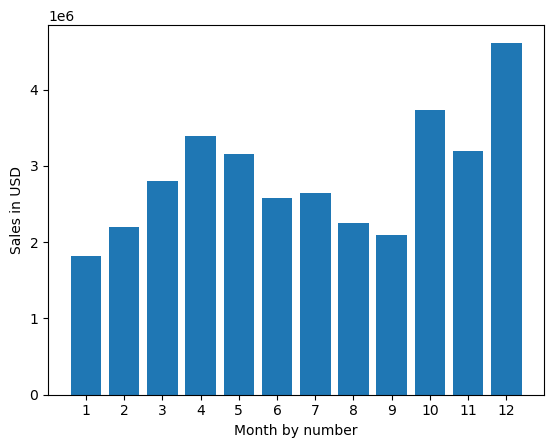

In [35]:
months = range(1,13)

plt.bar(months, results['Sales'])

plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month by number')

plt.show 

In [42]:
#adding a city column from the Purchase address using the apply method 

def get_state(address):
    return address.split(',')[2].split(' ')[1]

def get_city(address):
    return address.split(',')[1]

final_data['City'] = final_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

final_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA


What City had the most sales

In [43]:
results2 = final_data.groupby('City').sum()
print(results2)

                   Quantity Ordered  Price Each   Month       Sales
City                                                               
 Atlanta GA                   16602  2779908.20  104794  2795498.58
 Austin TX                    11153  1809873.61   69829  1819581.75
 Boston MA                    22528  3637409.77  141112  3661642.01
 Dallas TX                    16730  2752627.82  104620  2767975.40
 Los Angeles CA               33289  5421435.23  208325  5452570.80
 New York City NY             27932  4635370.83  175741  4664317.43
 Portland ME                   2750   447189.25   17144   449758.27
 Portland OR                  11303  1860558.22   70621  1870732.34
 San Francisco CA             50239  8211461.74  315520  8262203.91
 Seattle WA                   16553  2733296.01  104941  2747755.48


C:\Users\liamf\AppData\Local\Temp\ipykernel_15184\3764001257.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results2 = final_data.groupby('City').sum()


C:\Users\liamf\AppData\Local\Temp\ipykernel_15184\1658098817.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results2 =final_data.groupby('City').sum()['Sales']


<function matplotlib.pyplot.show(close=None, block=None)>

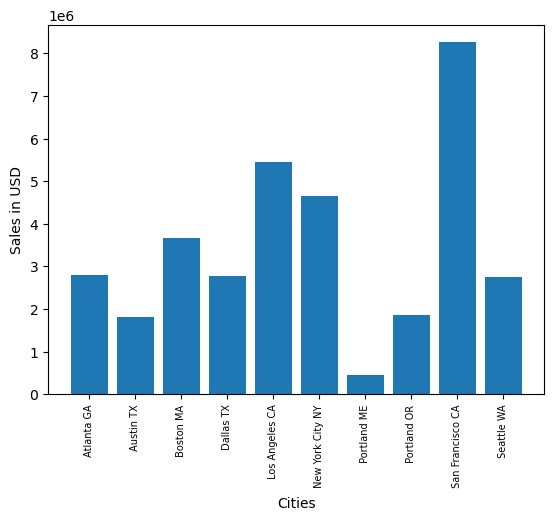

In [52]:
cities = [city for city, df in final_data.groupby('City')]

results2 =final_data.groupby('City').sum()['Sales']

plt.bar(cities, results2)
plt.xticks(cities, rotation='vertical', size=7)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')

plt.show 

best time to display advertisements to maximise sales

In [55]:
#converting order date to datetime format to easily extract the 'hour' of sale

final_data['Order Date Formatted'] = pd.to_datetime(final_data['Order Date'])

In [58]:
#creating hour column

final_data['Hour'] = final_data['Order Date Formatted'].dt.hour
final_data['Minute'] = final_data['Order Date Formatted'].dt.minute
final_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date Formatted,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14,38


<function matplotlib.pyplot.show(close=None, block=None)>

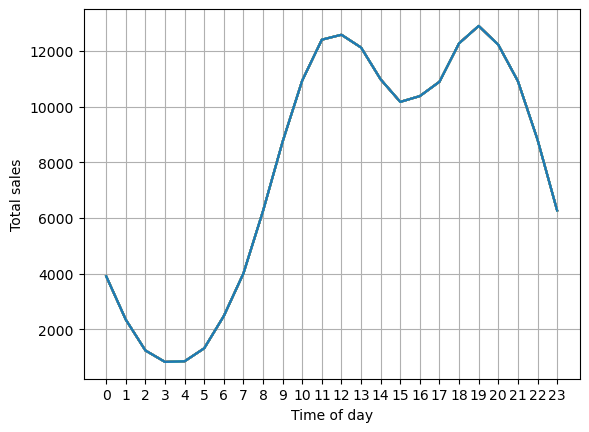

In [59]:
#displaying best time for advertisements

hours = [hour for hour, df in final_data.groupby('Hour')]
plt.plot(hours, final_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Time of day')
plt.ylabel('Total sales')
plt.show

# 10am would be a good time to begin running ads and 8pm would be a good time to stop running ads

1. What month obtained the most sales during the year?
The months with the highest sales were December, October, and April in that order.
2. What city obtained the most sales?
The cities with the most sales were San Fransisco CA, Los Angeles CA and New York City NY.
3. What is the best time to display adversitements?
10am would be a good time to begin running ads and 8pm would be a good time to stop running ads. 

These answers help in understanding what location and time of the year the company best performed in sales. 
Additionally, the company can implement changes in the times they produce advertisements to better improve their cost to turn overrate in sales by scheduling advertisements between 10am and 8pm.